# Early diagosis of Diabetes

## Introduction

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy 
Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.
With diabetes, your body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease. 
There is an increase in the number of diabetes pat as shown in this [report](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(23)01296-5/fulltext)

T]. This prompted me to carry out this analysis to predict if a patiwill  have diabetes based on her medical history.ith


## 1. Import Libraries

In [121]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [122]:
data_diabetes =pd.read_csv(r'C:\Users\Oluwa\OneDrive\Documents\MeriSkill Internship\DIABETES PATIENTS\diabetes.csv')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

To understand the distribution of variables and the relationships between them.

In [123]:
#Total no. of columns in the dataset
data_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [124]:
#data info
data_diabetes_info = data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
#To know more about the dataset with transpose
data_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [127]:
#Checking for Null values or not
data_diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [128]:
#count

data_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Visualization

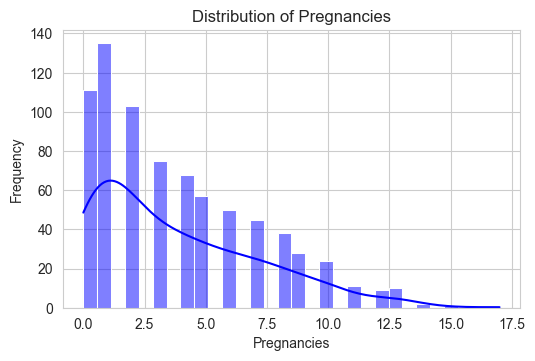

In [129]:
#configuration for visualization

sns.set_style("whitegrid")

#visualization of the distribution of the variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_diabetes.columns[:1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_diabetes[column], bins = 30, kde = True, color = "blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

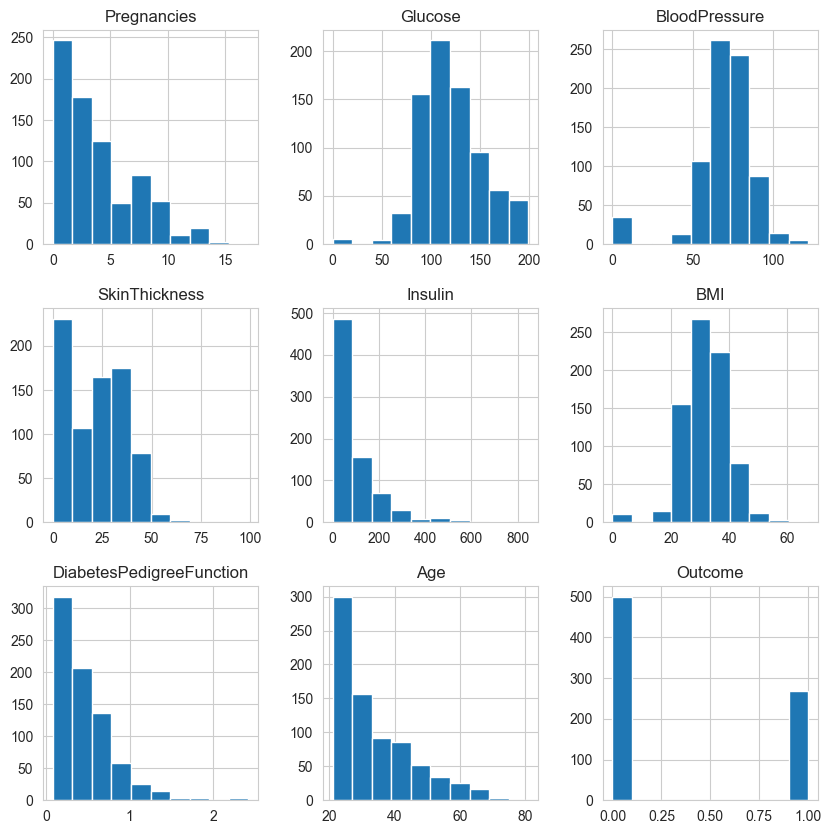

In [130]:
data_diabetes.hist(bins = 10, figsize=(10,10))
plt.show()

## 1. Distribution of variables:
* The variable pregnacies shows  a right-skewed distributiob, indicating that the majority of women in the data set have a low to moderate number of pregnancies.
* The glucose variable appears to have a small number of values set to 0, which may not be realistic and may require further review.
* The variables BloodPressure, SkinThickness and Insulin also have values of 0. We must decide if these values are realistic or if they represent missing data.
* The "Age" variable is skewed to the right, indicating that the majority of woment in the dataset are relatively young.


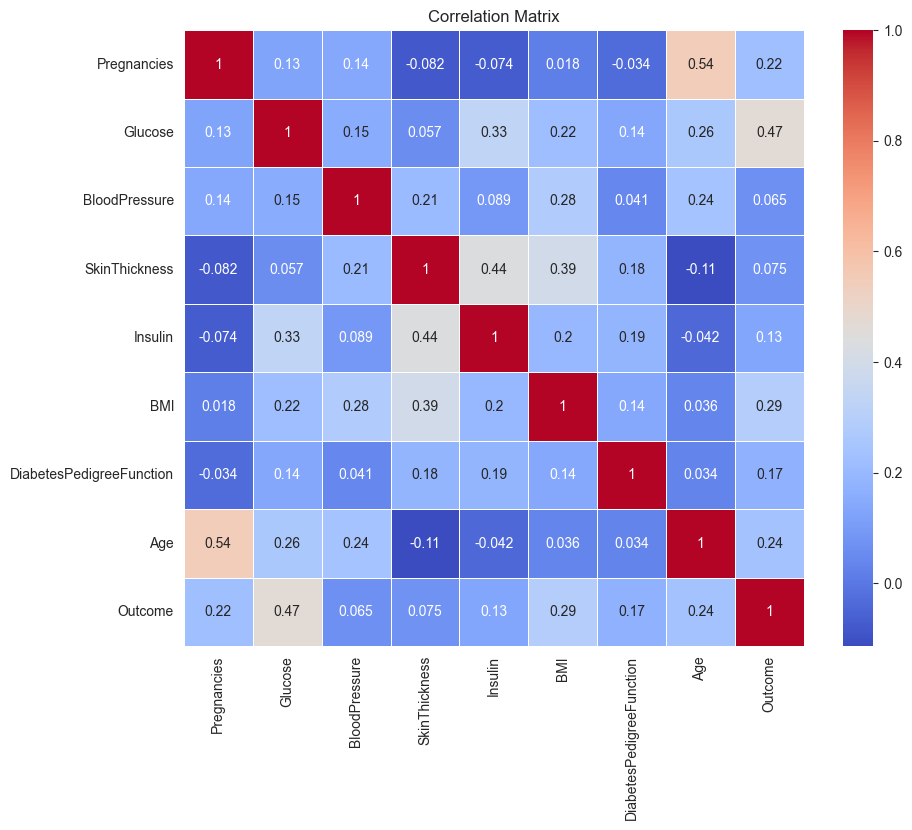

In [131]:
#visualization of the correlation between variables

plt.figure(figsize=(10, 8))
correlation_matrix = data_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Correlation between variables:
* The correlation matrix shows how the variables are related to each other. A value close to 1 or -1 indicates a strong positive or negative correlation, respecively.
* It can be seen that the variables "Glucose", "BMI" and "Age" have a moderate correlation with "Outcome", indicating that they could be important factors in predicting diabetes.

Given this analysis, the next steps include:
* Decide how to handle values of 0 for Glucose, BloodPressure, SkinThickness and Insulin.
* Standardize or normalize the characteristics, since they have different ranges and units.
* Split the data into training and test sets.
* Train a classification model.

## Data Preprocessing

1. Standardization of features : This includes normalizing or standardizing features, splitting the data set into training and testing, and possibly handling correlated or irrelevant features.

First, we will set the values of 0 for the variables Glucose, BloodPressure,  SkinThickness, and Insulin, replacing them with the median of each column.

In [132]:
#Defining columns that have values of 0 that must be treated
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

In [133]:
#Replacing 0 values with NaN
for column in columns_with_zeros:
    data_diabetes[column] = data_diabetes[column].replace(0, np.nan)

In [134]:
#Replacing the NaN with the median of each column
for column in columns_with_zeros:
    data_diabetes[column] = data_diabetes[column].fillna(data_diabetes[column].median())

In [135]:
#Checking if NaN values still exist in the data set
nan_values = data_diabetes.isnull().sum()

nan_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Standardization of Features: Features will be standardized to have mean 0 and standard deviation 1. This is important for many machine learning algorithms
3. Division of the data set: We will divide the dataset into training and testing in order to evaluate the model's ability to generalize on unseen data.
4. Classification Model Training: We will use a classification algorithm (e.g. Logistic Regression) to train the model
5. Model Evaluation: Once trained, we will evaluate its performance on the test set.

In [136]:
#Definition of the characterisics and the target variable
X = data_diabetes.drop("Outcome", axis = 1)
y = data_diabetes["Outcome"]

In [137]:
#Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [138]:
#Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

The data set have been divided into training and testing and standardized the features. The dimensions are as follows:

    * Training set: 614 records and 8 features
    * Test set: 154 records and 8 features


The next step is to train a classification model. for this purpose, I will start by using Logistic Regression, which is a simple but effective algorithm for binary classification problem.


## Logistic Regression

In [139]:
#Creating and training the logistic regression model
model = LogisticRegression(random_state = 42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [140]:
#predictions on the test set
y_pred = model.predict(X_test_scaled)

## Model evaluation

In [141]:
#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of the training Data :', accuracy)

Accuracy score of the training Data : 0.7532467532467533


In [142]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('The confussion matrix of the training Data :', conf_matrix)

The confussion matrix of the training Data : [[82 17]
 [21 34]]


In [143]:
class_report = classification_report(y_test, y_pred)
print('The class report of the training Data :', class_report)

The class report of the training Data :               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154




This is the confusion matrix: 
True Positive (TP): 8* 2
True Negative (TN): * 34
False Positive (FP):*  17
False Negative (FN

Accuracy, Precision, Recall, F1-Score:
precision    recall  f1-score   support
0       0.80      0.83      0.81        99
1       0.67      0.62      0.64   
     5
For class 0:
Precision: 0.80 (Out of all predicted positives for class 0, 80% were actually positive.)
Recall: 0.83 (Out of all actual positives for class 0, 83% were correctly predicted.)
F1-Score: 0.81 (A balance between precision and recall.)
For class 1:
Precision: 0.67
Recall:0.62
F1-Scor
e: 64
Overall A
accuracy                           0.75
The overall accuracy of the model is 75%. It represents the ratio of correctly predicted instances (both classes) to the total number of instances

Macro and Weighted Average:
macro avg       0.73      0.72      0.73       154
weighted avg    0.75      0.75      0.75       15

Macro Avg: The unweighted average of precision, recall, and F1-score across classes.
Weighted Avg: The weighted average of precision, recall, and F1-score, considering the number of instances for each class.4.ccuracy:5
): 21

Since the Logistic Regression model showed decent but improvable performance, I will use another classification algorithm: "Random Forest"

## Random Forest

In [144]:
#Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [145]:
#predictions on the test set
y_rf_pred = rf_model.predict(X_test_scaled)

In [146]:
#Model evaluation
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print('Accuracy score of the training Data :', accuracy)

Accuracy score of the training Data : 0.7532467532467533


In [147]:
#confusion matrix
rf_conf_matric = confusion_matrix(y_test, y_rf_pred)
print('Accuracy score of the training Data :', rf_conf_matric)

Accuracy score of the training Data : [[78 21]
 [20 35]]


In [148]:
#class report

rf_class_report = classification_report(y_test, y_rf_pred)
print('Accuracy score of the training Data :', rf_class_report)

Accuracy score of the training Data :               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [149]:
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_class_report = classification_report(y_test, y_rf_pred)

rf_accuracy, rf_conf_matrix, rf_class_report

(0.7337662337662337,
 array([[78, 21],
        [20, 35]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

Confusion Matrix:
array([[78, 21],
       [20, 35]], dtype=int64)
This is the confusion matrix. As explained earlier:

True Positive (TP): 78
True Negative (TN): 35
False Positive (FP): 21
False Negative (FN

Accuracy, Precision, Recall, F1-Score:
precision    recall  f1-score   support
0       0.80      0.79      0.79        99
1       0.62      0.64      0.63        5
For class 0:
Precision: 0.80 (Out of all predicted positives for class 0, 80% were actually positive.)
Recall: 0.79 (Out of all actual positives for class 0, 79% were correctly predicted.)
F1-Score: 0.79 (A balance between precision and recall.)
For class 1:
Precision: 0.62
Recall: 0.64
F1-Scor
e: 0.63
Overall A
accuracy                           0.73
The overall accuracy of the model is 73%. It represents the ratio of correctly predicted instances (both classes) to the total number of instances.

Macro and Weighted Average:
macro avg       0.71      0.71      0.71       154
weighted avg    0.73      0.73      0.73       154
Macro Avg: The unweighted average of precision, recall, and F1-score across classes.
Weighted Avg: The weighted average of precision, recall, and F1-score, considering the number of instances for each class.
These metrics provide a detailed evaluation of the model's performance for each class and overall. The model seems to have decent performance, with precision, recall, and F1-score values for both classes.
ccuracy:5
): 20


## Using Decision Tree

In [150]:
#Preprocess the data
#Set values to 0 for the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in columns_with_zeros:
    data_diabetes[column] = data_diabetes[column].replace(0, data_diabetes[column].median())


In [151]:
#split the data set into features (x) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [152]:
#Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [153]:
#Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)



DecisionTreeClassifier(random_state=42)

In [154]:
#Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:", class_report)

Accuracy: 0.7272727272727273
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [155]:
#importance of features
feature_importance = dt_model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Pregnancies, Importance: 0.06075661464468774
Feature: Glucose, Importance: 0.3356187205012328
Feature: BloodPressure, Importance: 0.08631253370211535
Feature: SkinThickness, Importance: 0.05500248709903033
Feature: Insulin, Importance: 0.078591582701987
Feature: BMI, Importance: 0.15055221284220968
Feature: DiabetesPedigreeFunction, Importance: 0.10966647017062481
Feature: Age, Importance: 0.12349937833811234


### Prediction

In [156]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [157]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


[[ 0.37979288  1.46912301 -0.01899526 -1.15546287  0.3917298  -0.79947408
   0.35009487  1.57410227]]


C:\Users\Oluwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [158]:
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


### Model Evaluation

In [159]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7272727272727273

In [160]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[78, 21],
       [21, 34]], dtype=int64)

In [161]:
#Class Report
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.79      0.79      0.79        99\n           1       0.62      0.62      0.62        55\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.70      0.70       154\nweighted avg       0.73      0.73      0.73       154\n'